In [2]:
import cv2
import numpy as np
import csv
import json
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

# JSON 파일 경로 및 이미지 폴더 경로 설정
# json_file = '/root/data/datasets/jsons/val.json'
json_file = '/root/outputs/resnet50_type02/submissions/20241008_093054.json'
image_folder = '/root/data/datasets/images/test/'

# JSON 파일 읽기
with open(json_file, 'r') as f:
    data = json.load(f)

# "images" 키에 있는 이미지별로 시각화 작업
for image_name, image_data in data['images'].items():
    # print(image_name, image_data)
    image_path = image_folder + image_name
    # print(image_path)
    image = cv2.imread(image_path)

    if image is None:
        print(f"이미지를 불러올 수 없습니다: {image_path}")
        continue
    
    # 단어별로 좌표(points)를 가져와서 그리기
    for word_id, word_data in image_data['words'].items():
        points = np.array(word_data['points'], dtype=np.int32)
        points = points.reshape((-1, 1, 2))  # 폴리곤을 그리기 위한 형식 변환
        cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)

    # BGR 이미지를 RGB로 변환 (matplotlib는 RGB 형식 사용)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 이미지 시각화 (Jupyter Notebook 내에서)
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    plt.title(f"Image - {image_name}")
    plt.axis('off')
    plt.show()
    # break

In [1]:
conti = 0
count = 0

In [ ]:
# JSON 파일 경로 및 이미지 폴더 경로 설정
# val셋의 예측결과 확인
# json_file = '/root/data/datasets/jsons/val.json'
json_file = '/root/data/datasets/jsons/merged_val2_final.json'
# image_folder = '/root/data/datasets/images/val/'
image_folder = '/root/data/datasets/remove_background/val/'

# JSON 파일 읽기
with open(json_file, 'r') as f:
    data_correct = json.load(f)


# json_file = '/root/outputs/redsnet50_type07_newimg/submissions/20241018_182503_origin_val.json'
json_file = '/root/outputs/resnet50_type08/submissions/20241023_145140_val.json'


with open(json_file, 'r') as f:
    data_pred = json.load(f)

# "images" 키에 있는 이미지별로 시각화 작업
for image_name_cor, image_data_cor  in data_correct['images'].items() :
    for image_name_pred, image_data_pred in data_pred['images'].items():

        if image_name_pred != image_name_cor:
            continue

        image_path = image_folder + image_name_pred
        
        image = cv2.imread(image_path)

        if image is None:
            print(f"이미지를 불러올 수 없습니다: {image_path}")
            continue
        
        # 단어별로 좌표(points)를 가져와서 그리기
        for word_id, word_data in image_data_cor['words'].items():
            points = np.array(word_data['points'], dtype=np.int32)
            points = points.reshape((-1, 1, 2))  # 폴리곤을 그리기 위한 형식 변환
            cv2.polylines(image, [points], isClosed=True, color=(0, 225, 0), thickness=4)
        

        for word_id, word_data in image_data_pred['words'].items():
            points = np.array(word_data['points'], dtype=np.int32)
            points = points.reshape((-1, 1, 2))  # 폴리곤을 그리기 위한 형식 변환
            cv2.polylines(image, [points], isClosed=True, color=(0, 0, 225), thickness=2)
       

        # BGR 이미지를 RGB로 변환 (matplotlib는 RGB 형식 사용)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # 이미지 시각화 (Jupyter Notebook 내에서)
        plt.figure(figsize=(10, 8))
        plt.imshow(image_rgb)
        plt.title(f"Image - {image_name_pred}, {image.shape}")
        plt.axis('off')
        plt.show()
        # break
    print(count)
    if count >= 9:
        break
    else:
        count += 1

/root/data/datasets/images/test/drp.en_ko.in_house.selectstar_000280.jpg


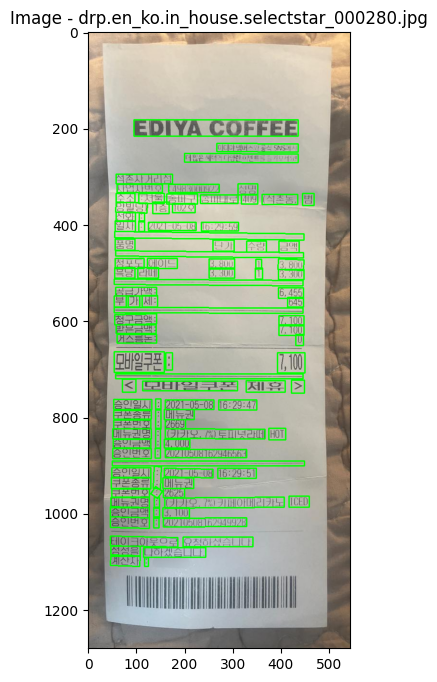

In [16]:
# 특정 이미지 시각화
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

# JSON 파일 경로 및 이미지 폴더 경로 설정
# resnet50_type04
json_file = '/root/outputs/resnet50_type04/submissions/20241010_235204_epoch13_test.json'
# resnet50_type03
# json_file = '/root/outputs/resnet50_type03/submissions/20241010_185932.json'
image_folder = "/root/data/datasets/images/test/"
img = 'drp.en_ko.in_house.selectstar_000280.jpg'


# JSON 파일 읽기
with open(json_file, 'r') as f:
    data = json.load(f)
    
# "images" 키에 있는 이미지별로 시각화 작업
# img = 'drp.en_ko.in_house.selectstar_'+check_img+'.jpg'

image_data = data['images'][img]
image_path = image_folder + img
# print(image_path)
image = cv2.imread(image_path)
print(image_path)
if image is None:
    print(f"이미지를 불러올 수 없습니다: {image_path}")


# 단어별로 좌표(points)를 가져와서 그리기
for word_id, word_data in image_data['words'].items():
    points = np.array(word_data['points'], dtype=np.int32)
    points = points.reshape((-1, 1, 2))  # 폴리곤을 그리기 위한 형식 변환
    cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)

# BGR 이미지를 RGB로 변환 (matplotlib는 RGB 형식 사용)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 이미지 시각화 (Jupyter Notebook 내에서)
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.title(f"Image - {img}")
# plt.axis('off')
plt.show()
    # break

In [ ]:
# JSON 파일 경로 및 이미지 폴더 경로 설정
# test셋의 예측결과 확인

conti = 0
count = 0

image_folder = '/root/data/datasets/images/test/'
# image_folder = '/root/data/datasets/remove_background/test/'

# JSON 파일 읽기
with open(json_file, 'r') as f:
    data_correct = json.load(f)


# json_file = '/root/outputs/resnet50_type07_newimg/submissions/20241018_182503_origin_val.json'
# json_file = '/root/outputs/resnet50_type07_newimg/submissions/20241018_184749_new_test.json'
# json_file = '/root/outputs/efficientnet_b0/submissions/20241024_014437_post_pro.json'
json_file = '/root/outputs/resnet50_type04/submissions/20241010_235204_epoch13_test.json'


with open(json_file, 'r') as f:
    data_pred = json.load(f)

# "images" 키에 있는 이미지별로 시각화 작업

for image_name_pred, image_data_pred in data_pred['images'].items():

    
    image_path = image_folder + image_name_pred
    
    image = cv2.imread(image_path)

    if image is None:
        print(f"이미지를 불러올 수 없습니다: {image_path}")
        continue
    
    # 단어별로 좌표(points)를 가져와서 그리기
    # for word_id, word_data in image_data_cor['words'].items():
    #     points = np.array(word_data['points'], dtype=np.int32)
    #     points = points.reshape((-1, 1, 2))  # 폴리곤을 그리기 위한 형식 변환
    #     cv2.polylines(image, [points], isClosed=True, color=(0, 225, 0), thickness=4)
    

    for word_id, word_data in image_data_pred['words'].items():
        points = np.array(word_data['points'], dtype=np.int32)
        points = points.reshape((-1, 1, 2))  # 폴리곤을 그리기 위한 형식 변환
        cv2.polylines(image, [points], isClosed=True, color=(0, 0, 225), thickness=2)
    

    # BGR 이미지를 RGB로 변환 (matplotlib는 RGB 형식 사용)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 이미지 시각화 (Jupyter Notebook 내에서)
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    plt.title(f"Image - {image_name_pred}, {image.shape}")
    plt.axis('off')
    plt.show()
    # break
    print(count)
    if count >= 20:
        break
    else:
        count += 1

/root/data/datasets/images/test/drp.en_ko.in_house.selectstar_000192.jpg


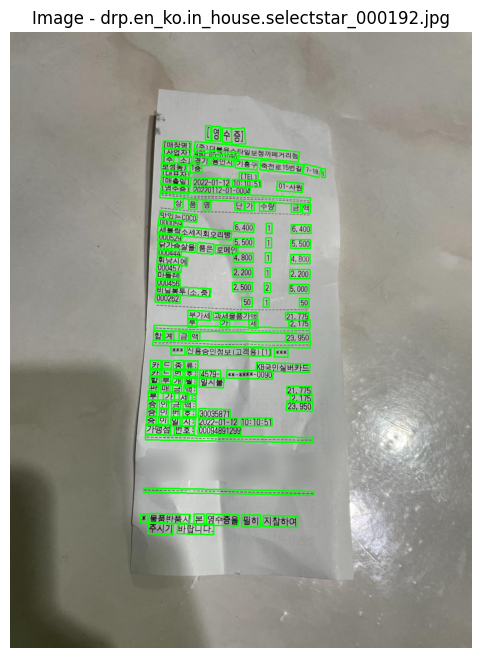

/root/data/datasets/images/test/drp.en_ko.in_house.selectstar_003311.jpg


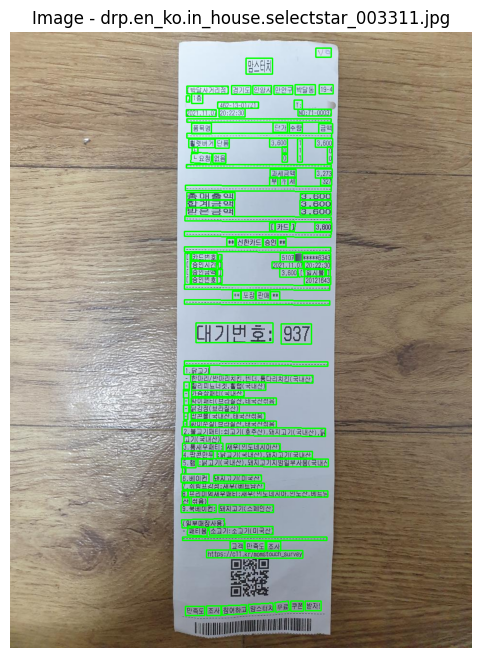

In [5]:
# 특정 이미지 추출하여 확인

image_folder = '/root/data/datasets/images/test/'
# image_folder = '/root/data/datasets/remove_background/test/'
# image_folder = '/root/data/datasets/remove_background/test/'
# json_file = '/root/data/datasets/jsons/train.json'


# # JSON 파일 읽기
# with open(json_file, 'r') as f:
#     data_correct = json.load(f)


# json_file = '/root/outputs/resnet50_type07_newimg/submissions/20241018_182503_origin_val.json'
# json_file = '/root/outputs/resnet50_type07_newimg/submissions/20241018_184749_new_test.json'
# json_file = '/root/outputs/resnet50_type07_newimg/submissions/20241018_184749_new_test_post_pro2.json'
json_file = '/root/outputs/efficientnet_b0/submissions/20241024_014437_post_pro.json'

with open(json_file, 'r') as f:
    data_pred = json.load(f)

check_list = [
    "000192", "003311"
]

# JSON 파일 읽기
# with open(json_file, 'r') as f:
#     data = json.load(f)

for check_img in check_list:
    img = 'drp.en_ko.in_house.selectstar_'+check_img+'.jpg'

    image_data = data_pred['images'][img]
    image_path = image_folder + img
    # print(image_path)
    image = cv2.imread(image_path)
    print(image_path)
    if image is None:
        print(f"이미지를 불러올 수 없습니다: {image_path}")


    # 단어별로 좌표(points)를 가져와서 그리기
    for word_id, word_data in image_data['words'].items():
        points = np.array(word_data['points'], dtype=np.int32)
        points = points.reshape((-1, 1, 2))  # 폴리곤을 그리기 위한 형식 변환
        cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)

    # BGR 이미지를 RGB로 변환 (matplotlib는 RGB 형식 사용)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 이미지 시각화 (Jupyter Notebook 내에서)
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    plt.title(f"Image - {img}")
    plt.axis('off')
    plt.show()
    # break